In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
# Charger le dataset iris
data = load_breast_cancer()
X_res, y_res = data.data, data.target

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_res, y_res)


# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser (utile pour KNN et régression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# Entraîner
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tester
y_pred_rf = rf.predict(X_test)



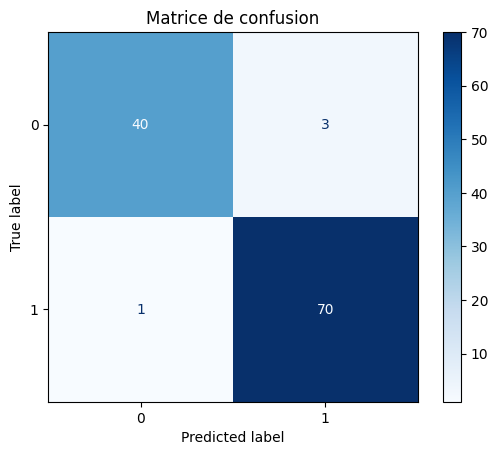

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Après avoir fait y_pred avec votre modèle
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Exemple pour y_test et y_pred

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision :", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred_rf, average='weighted'))


Accuracy : 0.9649122807017544
Precision : 0.9652053622194477
Recall : 0.9649122807017544
F1-score : 0.9647382344750765
